In [1]:
import numpy as np
import matplotlib.pyplot as plt

import ml_utils
import circle_utils

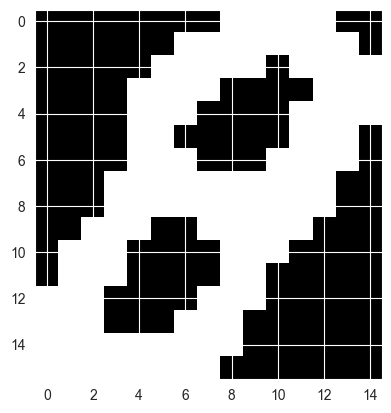

In [2]:
raw_data = ml_utils.load_data()

test_img = raw_data[1750].reshape(16,15)

img = circle_utils.threshold_image(test_img)

fig = plt.figure()
plt.imshow(img, cmap='gray', vmin=0, vmax=1)

In [3]:
circle_data = circle_utils.get_circle_data(raw_data)

In [4]:
circle_data.shape

(2000,)

In [5]:
for digit in range(10):
    results = [0 for _ in range(max(circle_data + 1))]
    for i in range(200):
        results[circle_data[digit * 200 + i]] += 1
    print(digit, results)

0 [3, 197, 0, 0, 0]
1 [199, 1, 0, 0, 0]
2 [197, 3, 0, 0, 0]
3 [200, 0, 0, 0, 0]
4 [197, 3, 0, 0, 0]
5 [198, 2, 0, 0, 0]
6 [2, 197, 1, 0, 0]
7 [199, 1, 0, 0, 0]
8 [0, 10, 189, 0, 1]
9 [6, 194, 0, 0, 0]


In [6]:
train_set, test_set = ml_utils.train_test_split(raw_data)
train_set = train_set.reshape((1000, 16, 15))

In [7]:
results = []
for threshold in range(10):
    results.append(circle_utils.get_circle_data(train_set, threshold=threshold / 10))

In [8]:
results=np.array(results)
results.shape

(10, 1000)

In [9]:
optimal_threshold = circle_utils.find_optimal_threshold(train_set, thresholds_to_try=10, verbose=True)
print(f'threshold with the best results: {optimal_threshold}')

threshold 0.0: 91.8% expected number of circles 
threshold 0.1: 91.8% expected number of circles 
threshold 0.2: 95.7% expected number of circles 
threshold 0.3: 95.7% expected number of circles 
threshold 0.4: 97.3% expected number of circles 
threshold 0.5: 98.3% expected number of circles 
threshold 0.6: 98.3% expected number of circles 
threshold 0.7: 92.3% expected number of circles 
threshold 0.8: 92.3% expected number of circles 
threshold 0.9: 91.5% expected number of circles 
threshold with the best results: 0.5
